In [3]:
from __future__ import print_function
import sys, os, math
import h5py
import numpy as np
from scipy import io
from os.path import join
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
import malis

/groups/turaga/home/turagas/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
# Load PyGreentea
# Relative path to where PyGreentea resides
sys.path.append('../../PyGreentea')
sys.path.append('../../zwatershed')
import PyGreentea as pygt
import zwatershed


In [12]:
def showme(dset,z):
    imshape = dset['data'].shape
    predshape = dset['pred'].shape[1:]
    off = [(s[0]-s[1])/2 for s in zip(imshape,predshape)]
    slc1 = slice(off[1],predshape[1]-off[1])
    slc2 = slice(off[2],predshape[2]-off[2])
    raw_slc=np.transpose(np.squeeze(dset['data'][z,slc1,slc2]),(1,0));
    if ('components' in dset):
        gt_slc=np.transpose(np.squeeze(dset['components'][z,slc1,slc2]),(1,0))
        aff_slc=np.transpose(np.squeeze(dset['label'][:3,z,slc1,slc2]),(2,1,0)).astype(np.float)
    test_slc=np.transpose(np.squeeze(dset['pred'][:3,z-off[0],:,:]),(2,1,0))
    seg_slc=np.transpose(np.squeeze(dset['predseg'][z-off[0],:,:]),(1,0))

    f, ax = plt.subplots(2, 3, sharey=True, figsize=(18.,12.));

    a=ax[0,0]
    a.imshow(raw_slc,cmap=plt.cm.get_cmap('gray'))
    if ('components' in dset):
        a.imshow(gt_slc,cmap=cmap,alpha=0.15);
    a.axis('off')

    a=ax[0,1]
    if ('components' in dset):
        ax[0,1].imshow(gt_slc,cmap=cmap);
    a.axis('off');

    a=ax[0,2]
    if ('components' in dset):
        a.imshow(aff_slc,cmap=plt.cm.get_cmap('gray'));
    a.axis('off');

    a=ax[1,0]
    a.imshow(raw_slc,cmap=plt.cm.get_cmap('gray'))
    a.imshow(seg_slc,cmap=cmap,alpha=0.15);
    a.axis('off')
    
    a=ax[1,1]
    a.imshow(seg_slc,cmap=cmap);
    a.axis('off');

    a=ax[1,2]
    a.imshow(test_slc,cmap=plt.cm.get_cmap('gray'));
    a.axis('off');

In [6]:
def showmecmp(dset,z):
    off = [(s[0]-s[1])/2 for s in zip(dset['data'].shape,dset['pred'].shape[1:])]
    raw_slc=np.transpose(np.squeeze(dset['data'][z,off[1]:-off[1],off[2]:-off[2]]),(1,0));
    if ('components' in dset):
        gt_slc=np.transpose(np.squeeze(dset['components'][z,off[1]:-off[1],off[2]:-off[2]]),(1,0))
        aff_slc=np.transpose(np.squeeze(dset['label'][:3,z,off[1]:-off[1],off[2]:-off[2]]),(2,1,0)).astype(np.float)
    test_slc=np.transpose(np.squeeze(dset['pred'][:3,z-off[0],:,:]),(2,1,0))
    seg_slc=np.transpose(np.squeeze(dset['predseg'][z-off[0],:,:]),(1,0))
    testavg_slc=np.transpose(np.squeeze(dset['predavg'][:3,z-off[0],:,:]),(2,1,0))
    segavg_slc=np.transpose(np.squeeze(dset['predsegavg'][z-off[0],:,:]),(1,0))

    f, ax = plt.subplots(3, 3, sharey=True, figsize=(18.,18.));

    a=ax[0,0]
    a.imshow(raw_slc,cmap=plt.cm.get_cmap('gray'))
    if ('components' in dset):
        a.imshow(gt_slc,cmap=cmap,alpha=0.15);
    a.axis('off')

    a=ax[0,1]
    if ('components' in dset):
        ax[0,1].imshow(gt_slc,cmap=cmap);
    a.axis('off');

    a=ax[0,2]
    if ('components' in dset):
        a.imshow(aff_slc,cmap=plt.cm.get_cmap('gray'));
    a.axis('off');

    a=ax[1,0]
    a.imshow(raw_slc,cmap=plt.cm.get_cmap('gray'))
    a.imshow(seg_slc,cmap=cmap,alpha=0.15);
    a.axis('off')
    
    a=ax[1,1]
    a.imshow(seg_slc,cmap=cmap);
    a.axis('off');

    a=ax[1,2]
    a.imshow(test_slc,cmap=plt.cm.get_cmap('gray'));
    a.axis('off');

    a=ax[2,0]
    a.imshow(raw_slc,cmap=plt.cm.get_cmap('gray'))
    a.imshow(segavg_slc,cmap=cmap,alpha=0.15);
    a.axis('off')
    
    a=ax[2,1]
    a.imshow(segavg_slc,cmap=cmap);
    a.axis('off');

    a=ax[2,2]
    a.imshow(testavg_slc,cmap=plt.cm.get_cmap('gray'));
    a.axis('off');

In [7]:
# Load the datasets
path = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/'
# Test set
dset = []
nhood = malis.mknhood3d()

dset.append({})
dname = 'tstvol-520-1-h5'
dset[-1]['name'] = dname
dset[-1]['nhood'] = nhood
dset[-1]['data'] = h5py.File(join(path,dname,'im_uint8.h5'),'r')['main']
dset[-1]['components'] = h5py.File(join(path,dname,'groundtruth_seg_thick.h5'),'r')['main']
dset[-1]['label'] = h5py.File(join(path,dname,'groundtruth_aff.h5'),'r')['main']
dset[-1]['pred'] = h5py.File(dname+'.h5','r')['main']

dset.append({})
dname = 'tstvol-520-2-h5'
dset[-1]['name'] = dname
dset[-1]['nhood'] = nhood
dset[-1]['data'] = h5py.File(join(path,dname,'im_uint8.h5'),'r')['main']
dset[-1]['components'] = h5py.File(join(path,dname,'groundtruth_seg_thick.h5'),'r')['main']
dset[-1]['label'] = h5py.File(join(path,dname,'groundtruth_aff.h5'),'r')['main']
dset[-1]['pred'] = h5py.File(dname+'.h5','r')['main']

off = [(s[0]-s[1])/2 for s in zip(dset[0]['data'].shape,dset[0]['pred'].shape[1:])]

In [8]:
nhood = malis.mknhood3d()
nseg = 0
t=50000
for iset in range(len(dset)):
    s = zwatershed.zwatershed(np.array(dset[iset]['pred'],dtype=np.float32),[50000])
    seg = s[0]
    dset[iset]['predseg'] = seg
#     (s,V) = zwatershed.zwatershed_and_metrics(
#         np.array(dset[iset]['components'],dtype=np.uint32),
#         np.array(dset[iset]['pred'],dtype=np.float32),[t],[t])
#     dset[iset]['predseg'] = s[0]
#     dset[iset]['V_Rand'] = V
    if off[0]>0:
        V=malis.compute_V_rand_N2(
            np.array(dset[iset]['components'][off[0]:-off[0],off[1]:-off[1],off[2]:-off[2]],dtype=np.uint32),
            dset[iset]['predseg'])
    else:
        V=malis.compute_V_rand_N2(
            np.array(dset[iset]['components'],dtype=np.uint32),dset[iset]['predseg'])
    dset[iset]['V_Rand'] = V
    nseg = np.max(seg)
    print('Number of segments (' , dset[iset]['name'] + '): ' , str(nseg))

cmap = matplotlib.colors.ListedColormap(np.vstack(((0,0,0),np.random.rand(max(10000,nseg),3))))

Number of segments ( tstvol-520-1-h5):  204250
Number of segments ( tstvol-520-2-h5):  237332


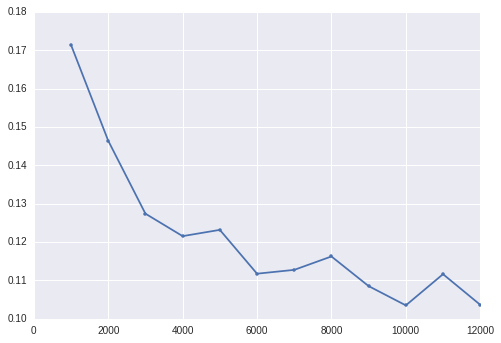

In [9]:
factor = 1000
m=io.loadmat('loss.mat')
m['loss']=m['loss'][:,1:].reshape((-1,factor))
m['t'] = np.arange(1,1+m['loss'].shape[0])*factor
plt.plot(m['t'],np.mean(m['loss'],axis=1),'.-');
plt.grid()

(0.20077299703767351, 0.59717174802426631, 0.12067182119076579)


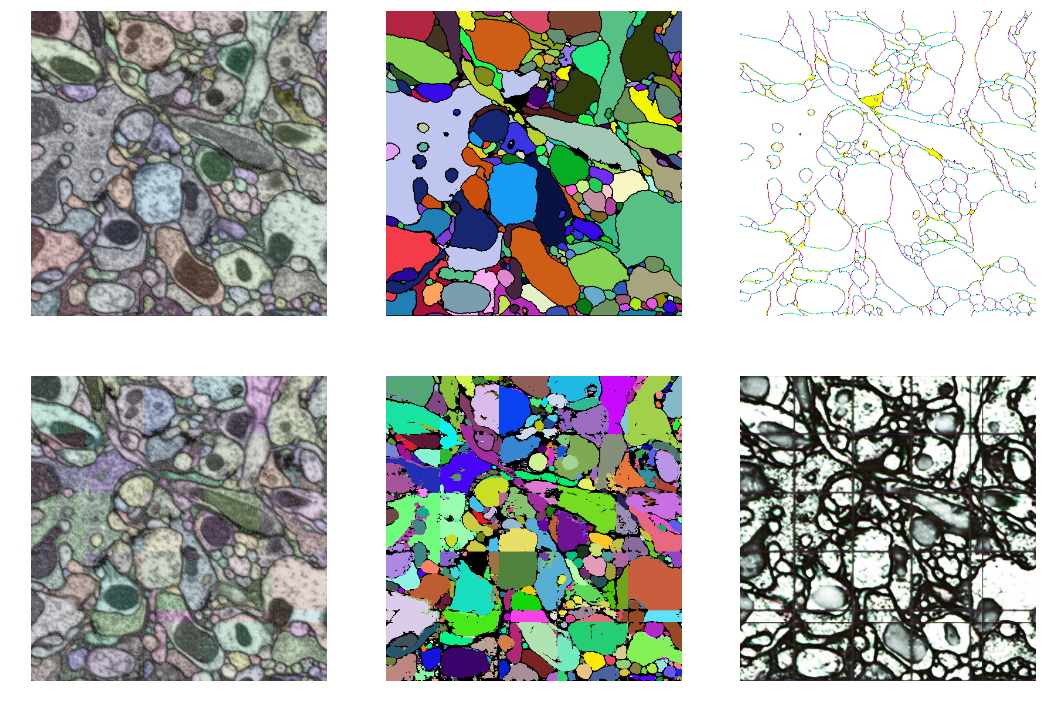

In [13]:
showme(dset[0],z=100)
print(dset[0]['V_Rand'])

(0.19647576504101505, 0.55400182362755968, 0.11941261946584704)


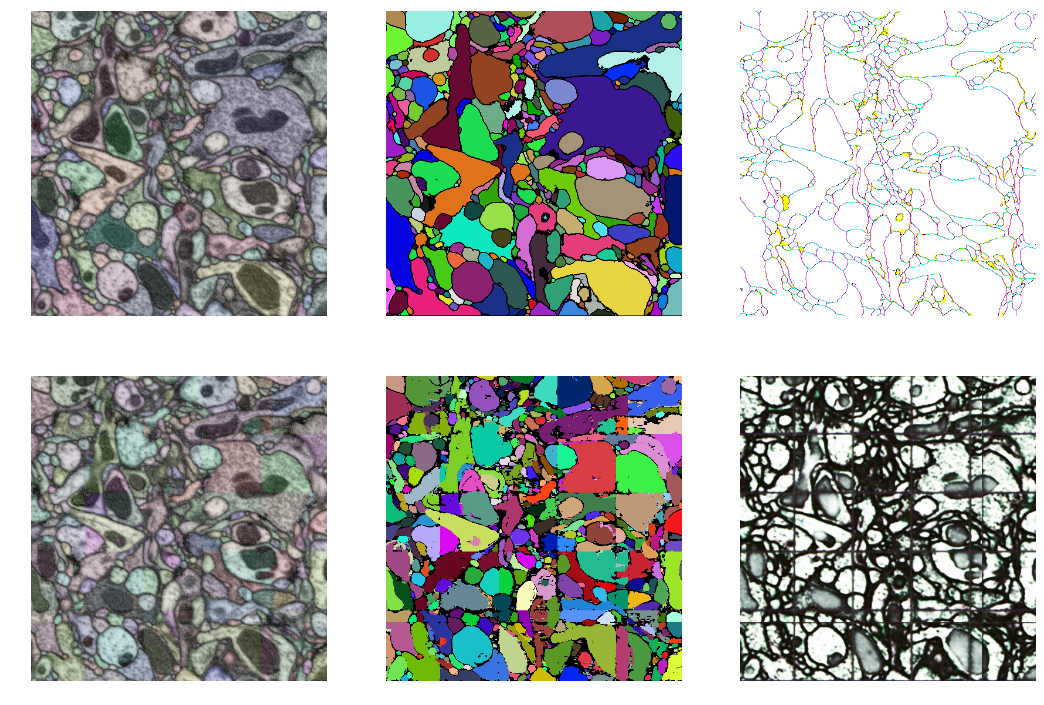

In [14]:
showme(dset[1],z=100)
print(dset[1]['V_Rand'])